In this excersise we will try to predice the price of a household using some parameter like the rooms available using a linear regression model

First we will try a simple linear regression model in 1D using numpy to familiarise ourselves with the least squares methos for 
linear regression
Then we will use the scikitliearn library to do a multivariate linear regression

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from matplotlib import pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
from sklearn.datasets import load_boston

boston=load_boston()

plt.hist(boston.target,bins=50)

(array([ 3.,  1.,  7.,  7.,  3.,  6.,  8., 10.,  8., 23., 15., 19., 14.,
        16., 18., 28., 36., 29., 33., 28., 37., 21., 15.,  4.,  7., 11.,
         9.,  9.,  5.,  7.,  7.,  8.,  2.,  8.,  5.,  4.,  2.,  1.,  1.,
         0.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  0.,  3., 16.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ,
        14.9, 15.8, 16.7, 17.6, 18.5, 19.4, 20.3, 21.2, 22.1, 23. , 23.9,
        24.8, 25.7, 26.6, 27.5, 28.4, 29.3, 30.2, 31.1, 32. , 32.9, 33.8,
        34.7, 35.6, 36.5, 37.4, 38.3, 39.2, 40.1, 41. , 41.9, 42.8, 43.7,
        44.6, 45.5, 46.4, 47.3, 48.2, 49.1, 50. ]),
 <a list of 50 Patch objects>)

# A simple way to see a linear regression fit #

Text(0.5,0,'NO. of rooms')

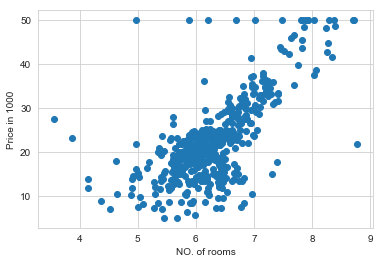

In [50]:


plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price in 1000')
plt.xlabel('NO. of rooms')






In [4]:
boston_df=DataFrame(boston.data)
boston_df.columns=boston.feature_names
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


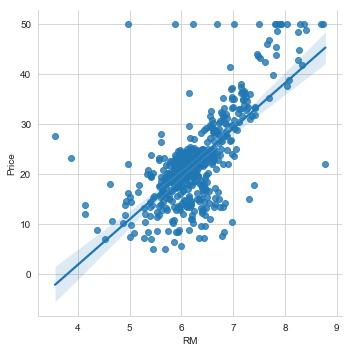

In [5]:
sns.lmplot('RM','Price',data=boston_df)

# regression using  numpy #

In [6]:


X=boston_df.RM
X


0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [7]:
X=np.vstack(boston_df.RM)
Y=boston_df.Price

In [8]:
#### matrix eqn y=mp m=[x 1]  p=[m
#                               c]

In [9]:
X=np.array([[value,1] for value in X])
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [10]:
m,b=np.linalg.lstsq(X,Y)[0]  ### runs the least square methon in the np.linear algebra library


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


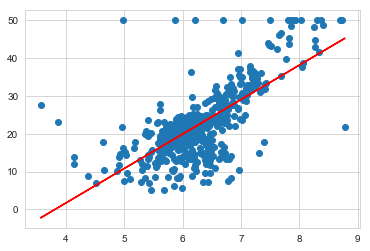

In [11]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x=boston_df.RM
plt.plot(x,m*x+b,'r',label='best fit line')

In [12]:
#### now we can find the standard deviation ###

result=np.linalg.lstsq(X,Y)

error_total=result[1]

rmse=np.sqrt(error_total/len(X))
print('the rms error is',rmse)

### 95% of the time yor value is at least going to be 2*rms error   

## REview normal distribution: 68,95,97.5 rule

the rms error is [6.60307139]


C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


###       using scikit learn to do a multivariable regression     #####

In [14]:
import sklearn
from sklearn.linear_model import LinearRegression


In [15]:
lreg=LinearRegression()

X_multi=boston_df.drop('Price',1)
Y_target=boston_df.Price


In [16]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print('The estimated intercept coeficient is',lreg.intercept_)
print('the number of coefficients used',len(lreg.coef_))



The estimated intercept coeficient is 36.49110328036135
the number of coefficients used 13


In [18]:
coeff_df=DataFrame(boston_df.columns)
coeff_df.columns=['Features']

coeff_df['Coefficient Estimate']=Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [19]:
##### we split the data into training set and a testing set o determine how good the model was

In [40]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X_multi,boston_df.Price)

In [41]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [42]:
#### predicting house prices ####

In [43]:
lreg=LinearRegression()
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)

In [45]:
print('Fit a model X_train and calculae the MSError with Y_train:',np.mean(Y_train-pred_train)**2)
print('Fit a model X_train and calculate MSE with X_est and Y_test',np.mean(Y_test-pred_test)**2)

Fit a model X_train and calculae the MSError with Y_train: 6.928957984381591e-29
Fit a model X_train and calculate MSE with X_est and Y_test 0.08940224070459234


 residual plots: Risidual=Observed value-Predicted value for each data

A graph to show the residual on vert axis and indipend variable ie price on horiz

if pts are randomly dispersed along horiz axis a linear reg is a good fit



Text(0.5,1,'Residual plot')

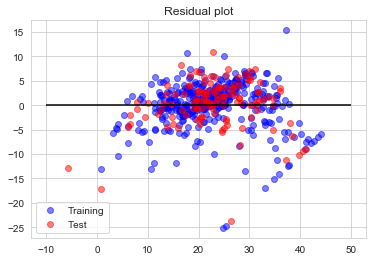

In [49]:
train=plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

test=plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=50)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual plot')

we see that the majority is scattered around the 0 hor axis which is what we want from a good linear model